In [1]:
import sys
import numpy as np
from package.filtredcells import *
from itertools import product
from package.tessellations import *
from matplotlib import colormaps as cm

# Cube Tessellation on Torus 2d

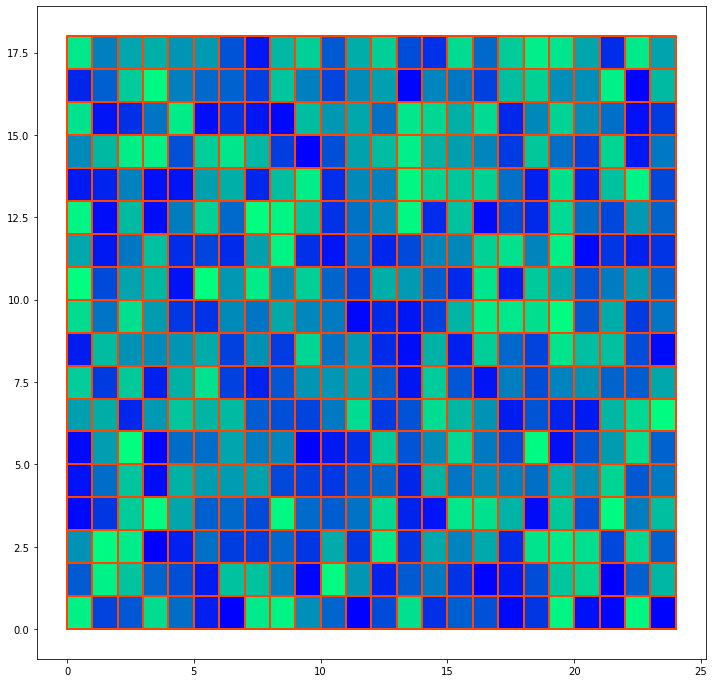

48


In [2]:
n, m = 24, 18
filtration = np.arange(n*m) / (n*m-1)
np.random.shuffle(filtration)
fc = get_cubical_tessellation_on_torus2d(n, m, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

print(sys.getsizeof(fc))

# Hexagonal Tessellation on Torus 2d

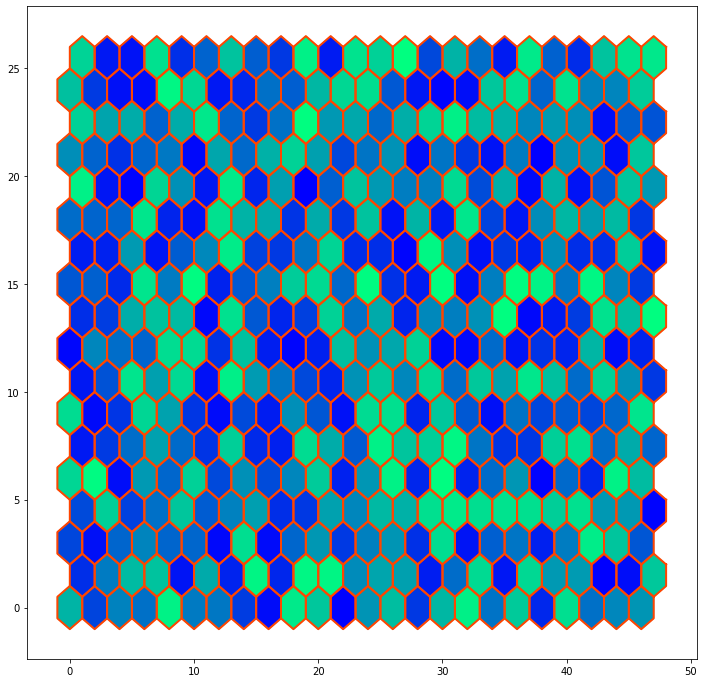

,Birth,Dimension
119,0.002840,0
120,0.397322,1
121,0.522728,1
122,0.997601,2


In [3]:
n, m, d = 24, 18, 9
filtration = np.random.random(n*m)
fc = get_hexagonal_tessolation_on_torus2d(n, m, d, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

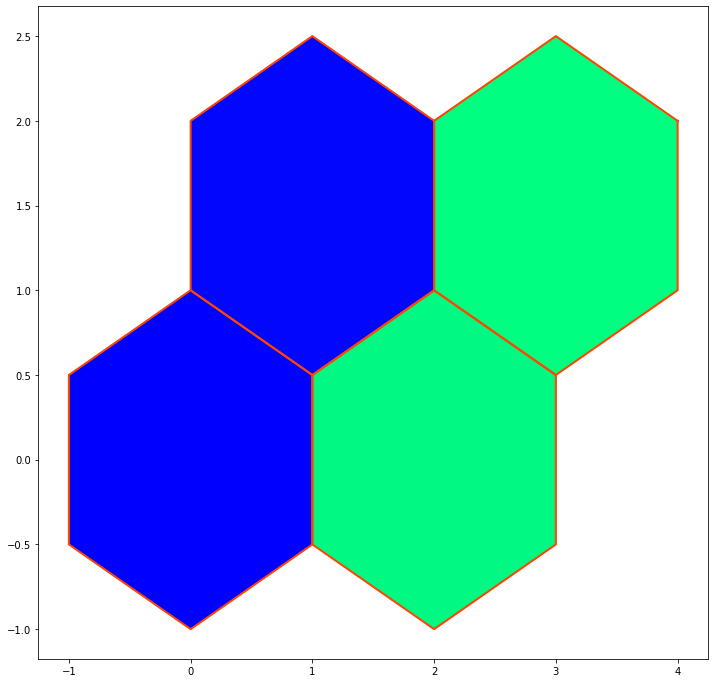

,Birth,Dimension
0,0.014241,0
1,0.846992,2
2,0.870542,2
3,0.870542,2
4,0.870542,2
5,0.870542,2


In [4]:
n = 2
filtration = np.random.random(n*n)
fc = get_hexagonal_tessolation_on_torus2d(n, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

# Triangle Tessellation on Torus 2d

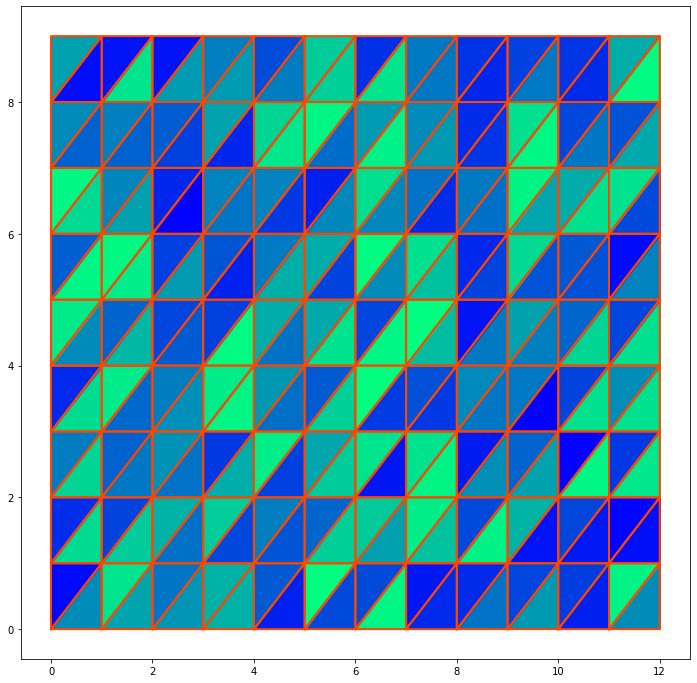

,Birth,Dimension
65,0.002040,0
66,0.227763,1
67,0.361927,1
68,0.999004,2


In [5]:
n, m = 12, 9
filtration = np.random.random(2*n*m)
fc = get_triangle_tessolation_on_torus2d(n, m, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

# Cube Tessellation on Torus 3d

In [6]:
n, m, k = 10, 10, 10
filtration = np.arange(n*m*k) / (n*m*k)
fc = get_cubical_tessellation_on_torus3d(n, m, k, filtration=filtration)

fc.initialize_complex(dimension=4)
fc.get_giant_cycles()

,Birth,Dimension
0,0.000,0
1,0.009,1
2,0.090,1
3,0.099,2
4,0.900,1
5,0.909,2
6,0.990,2
7,0.999,3


# Hexogonal Tessellation on Torus 3d

In [7]:
from itertools import product

In [8]:
def get_hexogonal_tessellation_on_torus3d(n: int, filtration=None):
    """
    Returns FiltredCells for octehedron tessellation on 3-dimensionall torus.
    Truely octahedron tessellation is not possible. So that tesselation will have a lot of 2-dim giant cycles.
    
    Parameters:
    -----------
    n : int
        Half sizes of tessellation
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    centers = np.array(list(product(np.arange(-n+1, n), repeat=4)))
    centers = 2*centers[centers.sum(axis=1) == 0]
    pass


In [9]:
get_hexogonal_tessellation_on_torus3d(3)


In [10]:
unit_simplices = np.array(list(product(np.arange(-1, 2), repeat=4)))
unit_simplices = unit_simplices[unit_simplices.sum(axis=1) == 0]
unit_simplices = unit_simplices[abs(unit_simplices).sum(axis=1) == 2]

unit_simplices

array([[-1,  0,  0,  1],
       [-1,  0,  1,  0],
       [-1,  1,  0,  0],
       [ 0, -1,  0,  1],
       [ 0, -1,  1,  0],
       [ 0,  0, -1,  1],
       [ 0,  0,  1, -1],
       [ 0,  1, -1,  0],
       [ 0,  1,  0, -1],
       [ 1, -1,  0,  0],
       [ 1,  0, -1,  0],
       [ 1,  0,  0, -1]])

# Lattice D3 Tessellation on Torus 3d

In [11]:
n, m, k = 3, 5 ,4
#filtration = np.arange(4*n*m*k) / (4*n*m*k)
filtration = np.random.random(4*n*m*k)

fc = get_latticeD3_tessellation_on_torus3d(n, m, k, filtration=filtration)
fc.initialize_complex(dimension=4)
info = fc.get_cycle_info()
fc.get_giant_cycles()

,Birth,Dimension
88,0.002486,0
89,0.118832,1
90,0.123935,1
91,0.194943,1
92,0.656902,2
93,0.699109,2
94,0.840006,2
95,0.995734,3


In [12]:
info[info['Death'] != np.inf].groupby('Dimension').agg({'Dimension': ['count'],
                                                          'Birth': ['mean', 'var'], 
                                                          'Death': ['mean', 'var']})

Dimension     Birth               Death          
              count      mean       var      mean       var
Dimension                                                  
0                10  0.057261  0.003970  0.112840  0.001396
1                60  0.329919  0.019984  0.538461  0.017119
2                18  0.764032  0.006567  0.911698  0.005911

In [13]:
info2 = info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values
info2 = pd.DataFrame([[i,(info2 == i).sum()] for i in np.unique(info2)], columns=['Birth', 'Count'])
assert (info2.groupby('Count').count().index.values * info2.groupby('Count').count()['Birth'].values).sum() == len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)])
info2.groupby('Count').count().transpose()

Count,1
Birth,3


/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/tmp/ipykernel_180753/3786776456.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


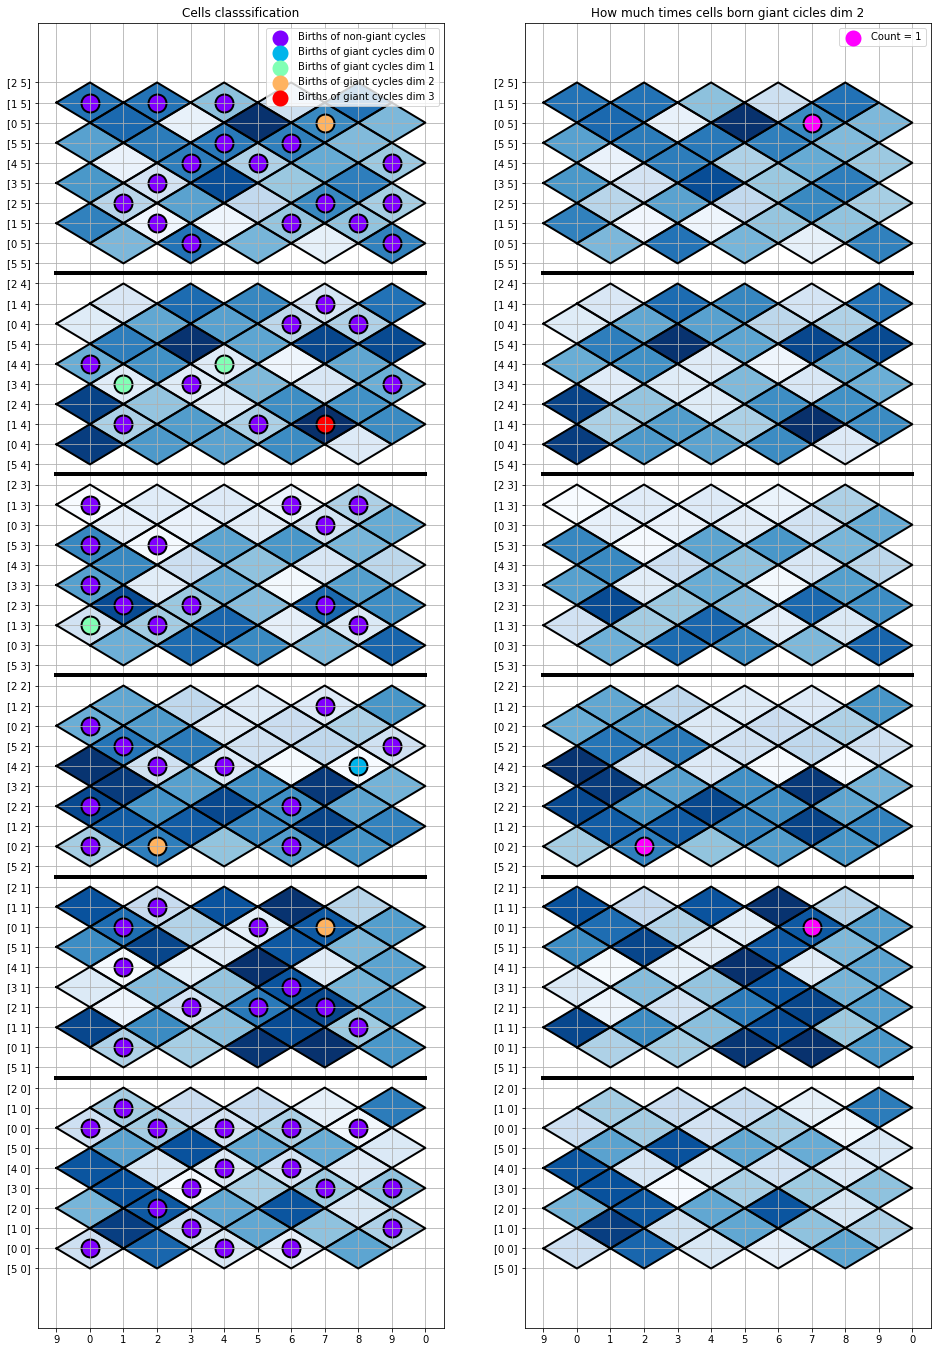

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16,24))

# Cells classsification

fc.draw_filtration(colormap='Blues', edgecolor='black', ax=axs[0])
axs[0].set_title('Cells classsification')

axs[0].set_xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
axs[0].set_yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

colors = np.arange(5)/4
colors = [cm['rainbow'](i) for i in colors]

x, y = fc.cords[np.isin(filtration, info[(info['Death'] != np.inf)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[0], linewidth=10, label='Births of non-giant cycles')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[1], linewidth=10, label='Births of giant cycles dim 0')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[2], linewidth=10, label='Births of giant cycles dim 1')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[3], linewidth=10, label='Births of giant cycles dim 2')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[4], linewidth=10, label='Births of giant cycles dim 3')

for i in range(2*n - 1):
    axs[0].plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
axs[0].legend()
axs[0].grid(True)

# How much times cells born giant cicles dim 2

axs[1].set_title('How much times cells born giant cicles dim 2')
fc.draw_filtration(colormap='Blues', edgecolor='black', ax=axs[1])

axs[1].set_xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
axs[1].set_yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

counts = np.unique(info2['Count'])
colors = np.arange(len(counts)) / max(1, len(counts)-1)
colors = [cm['spring'](i) for i in colors]
for i in range(len(counts)):
    x, y = fc.cords[np.isin(filtration, info2[(info2['Count'] == counts[i])]['Birth'].values)].mean(axis=1).transpose()
    axs[1].scatter(x, y, color='black', linewidth=14)
    axs[1].scatter(x, y, facecolor=colors[i], linewidth=10, label='Count = {0}'.format(counts[i]))

for i in range((2*n - 1)):
    axs[1].plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
axs[1].legend()
axs[1].grid(True)
fig.show()

# Otcahedron Tessellation on Torus 3d

Truely octahedron tessellation is not possible.
So there will be tessellation of 3-dimensionall torus by octahedrons and tetrahedrons

In [15]:
raise False

TypeError: exceptions must derive from BaseException

In [ ]:
def get_octehedron_tessellation_on_torus3d(n: int, m=None, k=None, filtration=None):
    """
    Returns FiltredCells for tessellation of 3-dimensionall torus by octahedrons and tetrahedrons.
    Truely octahedron tessellation is not possible. So that tesselation will have a lot of 2-dim giant cycles.
    
    Parameters:
    -----------
    n, m, k: int
        Half sizes of tessellation
        If m is None, that becomes same as n
        If k is None, that becames same as m
    
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    if m is None:
        m = n
    if k is None:
        k = m
    verts = np.array(list(product(np.arange(2*n), np.arange(2*m), np.arange(2*k))))
    verts = verts[verts.sum(axis=1) % 2 == 0]
    if (np.array([n, m, k]) == 1).any():
        unit_cell_oct = np.array([[[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                  [[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                  [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                  [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]], 
                                  [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                  [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                  [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                  [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    else:
        unit_cell_oct = np.array([[[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                  [[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                  [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                  [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    unit_cell_tet = np.array([[[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]]])
    cells_oct = [vert + unit_cell_oct for vert in verts]
    cells_tet = [vert + unit_cell_tet for vert in verts]
    cells = np.array(cells_oct)
    cells %= np.array([2*n, 2*m, 2*k])
    cells *= np.array([1, 2*n, 4*n*m])
    cells = cells.sum(axis=-1)
    
    if filtration is None:
        filtration = np.zeros(4*n*m*k)
    fc = FiltredCells(cells, filtration=filtration)
    
    # create cords
    if True:
        if m is None:
            m = n
        if k is None:
            k = m
        cords_oct = []
        unit_cord_oct = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
        for vert in verts:
            center0 = np.array([vert[1], vert[2] + 2*(2*k+2)*vert[0]])
            cord0 = center0 + 1.0*unit_cord_oct
            center1 = np.array([vert[1], vert[2] + 1*(2*k+2)*vert[0]])
            cord1 = center1 + 0.5*unit_cord_oct
            center1 = np.array([vert[1], vert[2] - 1*(2*k+2)*vert[0]])
            cord1 = center1 + 0.5*unit_cord_oct
            cords_oct.append([cord0, cord1])
        cords = np.array(cords_oct)
        fc.set_cords(cords)
        # create yticks
        fc.yticks = np.arange(2*n*(2*k+2)) - 1
        fc.ylabels = np.array([(fc.yticks+1) % (2*k+2) - 1, (fc.yticks+1) // (2*k+2)]).transpose()
    
    return fc

In [ ]:
n, m, k = 1, 2, 1
filtration = np.arange(4*n*m*k) / (4*n*m*k)

#filtration = np.random.random(4*n*m*k)

fc = get_octehedron_tessellation_on_torus3d(n, m, k, filtration=filtration)
fc.initialize_complex(dimension=4)
info = fc.get_cycle_info()
fc.get_giant_cycles().head(24)

In [ ]:
plt.figure(figsize=(8, 24))
fc.draw_filtration(colormap='Blues', edgecolor='black')
plt.title('Cells classsification')

plt.xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
plt.yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

colors = np.arange(5)/4
colors = [cm['rainbow'](i) for i in colors]

x, y = fc.cords[np.isin(filtration, info[(info['Death'] != np.inf)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[0], linewidth=10, label='Births of non-giant cycles')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[1], linewidth=10, label='Births of giant cycles dim 0')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[2], linewidth=10, label='Births of giant cycles dim 1')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[3], linewidth=10, label='Births of giant cycles dim 2')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[4], linewidth=10, label='Births of giant cycles dim 3')

for i in range(2*n - 1):
    plt.plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Nongiant cycles:', len(info[info['Death'] != np.inf]))
print('Giant cycles dim 0:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]))
print('Giant cycles dim 1:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]))
print('Giant cycles dim 2:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]))
print('Giant cycles dim 3:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]))

In [ ]:
info2 = info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values
info2 = pd.DataFrame([[i,(info2 == i).sum()] for i in np.unique(info2)], columns=['Birth', 'Count'])
info2.groupby('Count').count().transpose()

In [ ]:
assert (info2.groupby('Count').count().index.values * info2.groupby('Count').count()['Birth'].values).sum() == len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)])

In [ ]:
plt.figure(figsize=(8, 24))
plt.title('How much times cells born giant cicles dim 2')
fc.draw_filtration(colormap='Blues', edgecolor='black')
#fc.draw_filtration()

plt.xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
plt.yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

counts = np.unique(info2['Count'])
colors = np.arange(len(counts)) / max(1, len(counts)-1)
colors = [cm['rainbow'](i) for i in colors]
for i in range(len(counts)):
    x, y = fc.cords[np.isin(filtration, info2[(info2['Count'] == counts[i])]['Birth'].values)].mean(axis=1).transpose()
    plt.scatter(x, y, color='black', linewidth=14)
    plt.scatter(x, y, facecolor=colors[i], linewidth=10, label='Count = {0}'.format(counts[i]))

for i in range(2*(2*n - 1)):
    plt.plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_vc = pd.DataFrame([[i, (fc.cells==i).sum()] for i in np.unique(fc.cells)], columns=['Vertex', 'Count'])
df_vc.head(24)

In [ ]:
for i in np.unique(df_vc['Count']):
    arr = df_vc[df_vc['Count'] == i]['Vertex'].values
    print(str(i) + ':    length: ' + str(len(arr)) + '\n' + arr.__str__())

In [ ]:
vertex_types = [df_vc[df_vc['Count'] == i]['Vertex'].values[0]  for i in np.unique(df_vc['Count'])]
for vertex in vertex_types:
    print('You can find the vertex', vertex, 'in simplices:')
    print(fc.cells[(fc.cells == vertex).any(axis=-1)])

In [ ]:
from package.cycles import get_simplex_filtration_dict
simplex_filtration_dict = get_simplex_filtration_dict(fc.simplextree)


birth_types = {i: info2[info2['Count'] == i]['Birth'].values[0] for i in np.unique(info2['Count'])}
birth_lengths = {i: len(info2[info2['Count'] == i]['Birth'].values) for i in np.unique(info2['Count'])}
for birth_type in birth_types:
    print('Count = {0}      Length = {1}'.format(birth_type, birth_lengths[birth_type]))
    
    for pair in fc.simplextree.persistence_pairs():
        if simplex_filtration_dict[tuple(np.sort(pair[0]))] == birth_types[birth_type]:
            print('Birth simplex: {0:16}'.format(str(pair[0])), 
                  'Death simplex: {0:16}'.format(str(pair[1])))
    print()